In [37]:
# Read data from file
import pandas as pd
import numpy as np
df = pd.read_excel('C:/Users/Thinkpad/Desktop/IE598/hw4/housing.xlsx')
df=df.dropna()
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [27]:
# Summary of data
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000
mean,1.420825,12.721239,10.304889,0.077434,0.540816,6.343538,65.557965,4.043570,7.823009,377.442478,18.247124,369.826504,11.441881,23.750442
std,2.495894,24.326032,6.797103,0.267574,0.113816,0.666808,28.127025,2.090492,7.543494,151.327573,2.200064,68.554439,6.156437,8.808602
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,6.300000
25%,0.069875,0.000000,4.930000,0.000000,0.447000,5.926750,40.950000,2.354750,4.000000,276.750000,16.800000,377.717500,6.587500,18.500000
50%,0.191030,0.000000,8.140000,0.000000,0.519000,6.229000,71.800000,3.550400,5.000000,307.000000,18.600000,392.080000,10.250000,21.950000
75%,1.211460,20.000000,18.100000,0.000000,0.605000,6.635000,91.625000,5.401100,7.000000,411.000000,20.200000,396.157500,15.105000,26.600000
max,9.966540,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.410000,50.000000


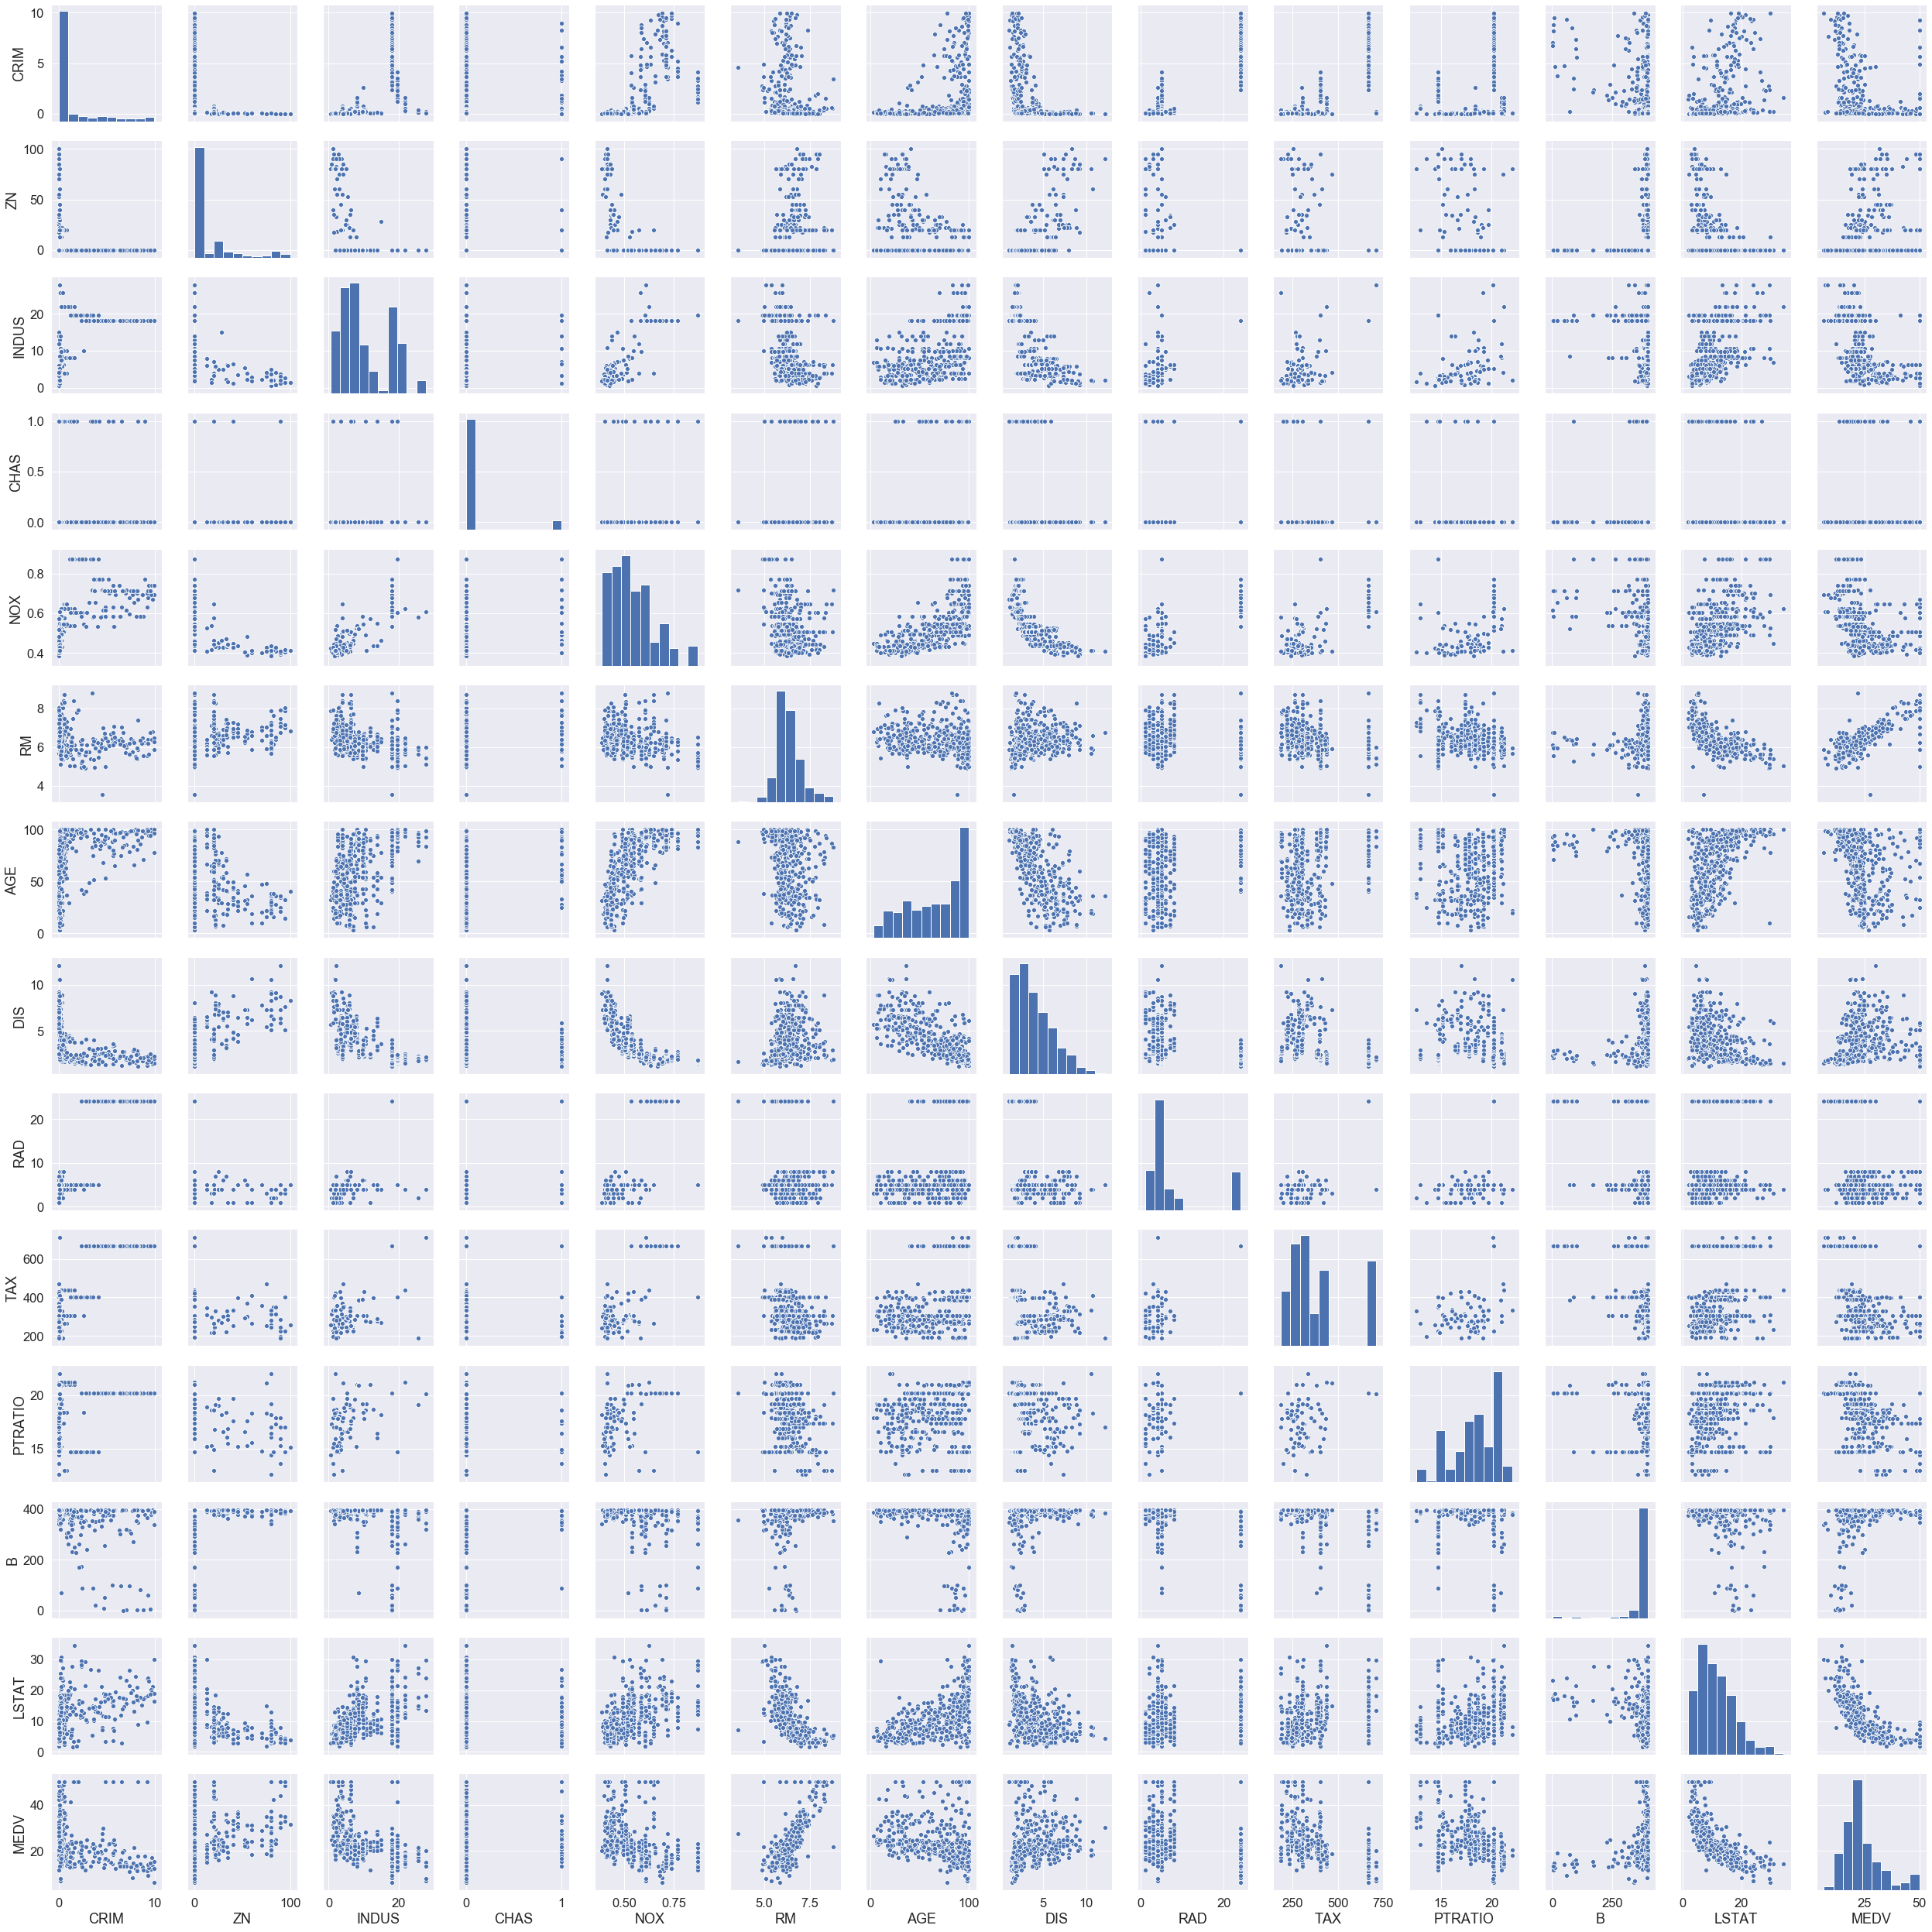

In [29]:
# Data overview: scatterplots and histograms
import matplotlib.pyplot as plt
import seaborn as sns
cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
sns.pairplot(df[cols], height=2.5)
plt.tight_layout()
plt.show()

In [71]:
# Train-test split
from sklearn.model_selection import train_test_split
X=df.values[:,:13]
y=df.values[:,13]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

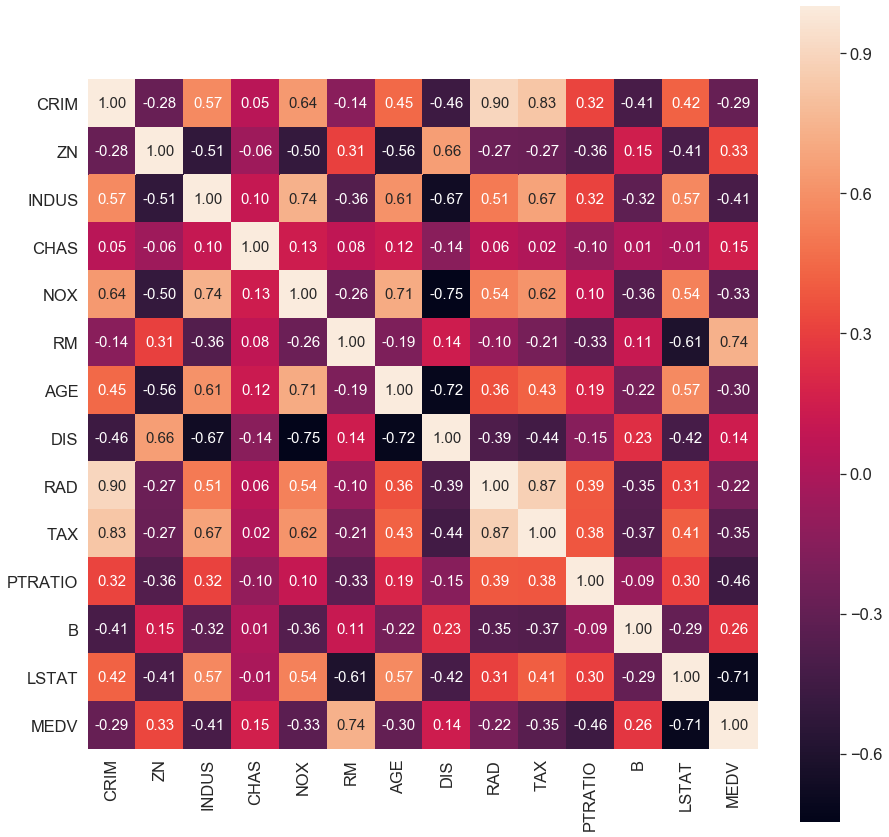

In [156]:
# Correlation coefficients heatmap
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=cols, xticklabels=cols)
plt.gcf().set_size_inches(15, 15)
plt.show()

In [155]:
# Import necessary modules
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train,y_train)

# Predict on the test data: y_pred
y_test_reg_pred = reg_all.predict(X_test)
y_train_reg_pred = reg_all.predict(X_train)

In [154]:
print("lnr coefficients: {}".format(reg_all.coef_))
print("lnr y intercept: {}".format(reg_all.intercept_))

lnr coefficients: [-2.10978212e-01  3.03333448e-02  5.21741626e-02  1.78646977e+00
 -1.16261232e+01  5.31801604e+00 -2.06780275e-02 -1.33978603e+00
  2.48794157e-01 -9.31036789e-03 -8.78367327e-01  1.36707717e-02
 -4.79318745e-01]
lnr y intercept: 20.4002077093167


In [146]:
# Function that plot residual errors
def plot_residuals(y_train_pred,y_test_pred,y_train,y_test):
    plt.scatter(y_train_pred,  y_train_pred - y_train, c='steelblue', marker='o', edgecolor='white', label='Training data')
    plt.scatter(y_test_pred,  y_test_pred - y_test, c='limegreen', marker='s', edgecolor='white', label='Test data')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.legend(loc='upper left')
    plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
    plt.xlim([-10, 50])
    plt.show()

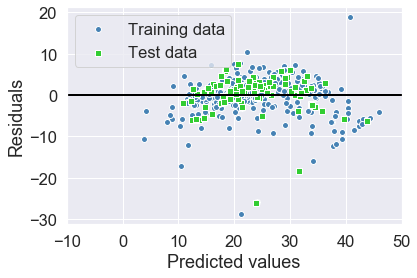

In [147]:
# Plot residual errors for linear regression model
plot_residuals(y_train_reg_pred,y_test_reg_pred,y_train,y_test)

In [153]:
# Compute and print R^2 and RMSE
print("lnr R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test,y_test_pred))
print("lnr Root Mean Squared Error: {}".format(rmse))

lnr R^2: 0.6976755382220081
lnr Root Mean Squared Error: 4.579877160904839


In [134]:
from sklearn.model_selection import cross_val_score
# Function that computes the best alpha for a specific regularization method
# by looking for the alpha with highest cross-validated R^2 scores
def best_alpha(X,y,method):
    # Setup the array of alphas and lists to store scores
    alpha_space = np.logspace(-4, 0, 50)
    scores = []
    # Compute scores over range of alphas using cross validation
    for alpha in alpha_space:
        method.alpha = alpha
        cv_scores = cross_val_score(method,X,y,cv=10)
        scores.append(np.mean(cv_scores))
    # Return the alpha with the highest score
    return alpha_space[scores.index(max(scores))]

In [136]:
# Comput best alphas for lasso and ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
lasso = Lasso(normalize=True)
ridge = Ridge(normalize=True)
alpha_lasso = best_alpha(X,y,lasso)
alpha_ridge = best_alpha(X,y,ridge)
print("The best alpha for lasso: {}".format(alpha_lasso))
print("The best alpha for ridge: {}".format(alpha_ridge))

The best alpha for lasso: 0.0035564803062231283
The best alpha for ridge: 0.18420699693267145


lasso coefficients: [-0.00000000e+00  1.87170633e-02  0.00000000e+00  1.74036640e+00
 -9.24844214e+00  5.36439809e+00 -1.62786587e-02 -1.15052728e+00
  1.04300234e-01 -4.62380283e-03 -8.29530001e-01  1.33260009e-02
 -4.90616173e-01]
lasso y intercept: 16.87558724270154
lasso R^2: 0.6903534443276614
ridge Root Mean Squared Error: 4.635006124244924


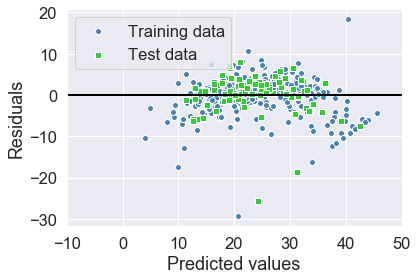

In [151]:
#LASSO regression
lasso.alpha=alpha_lasso
lasso.fit(X_train,y_train)

# Predict on the data
y_test_lasso_pred = lasso.predict(X_test)
y_train_lasso_pred = lasso.predict(X_train)

# Compute and print the coefficients and intercept
print("lasso coefficients: {}".format(lasso.coef_))
print("lasso y intercept: {}".format(lasso.intercept_))

# Compute and print R^2 and RMSE
print("lasso R^2: {}".format(lasso.score(X_test, y_test)))
lasso_rmse = np.sqrt(mean_squared_error(y_test,y_test_lasso_pred))
print("ridge Root Mean Squared Error: {}".format(lasso_rmse))

# Plot residual errors
plot_residuals(y_train_lasso_pred,y_test_lasso_pred,y_train,y_test)

ridge coefficients: [-6.18603449e-02  1.70870792e-02 -2.91081533e-02  2.02987711e+00
 -5.59143958e+00  4.87875449e+00 -1.39473778e-02 -8.34531464e-01
  8.38248700e-02 -3.95048822e-03 -7.50490740e-01  1.24672989e-02
 -4.35898710e-01]
ridge y intercept: 15.093536364848706
ridge R^2: 0.6802416871869219
ridge Root Mean Squared Error: 4.71007808898328


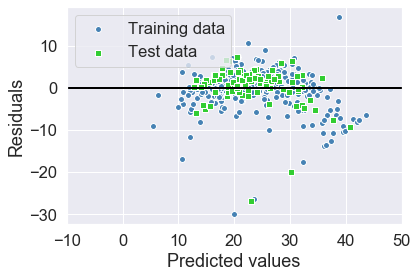

In [152]:
#Ridge regression
ridge.alpha=alpha_ridge
ridge.fit(X_train,y_train)

# Predict on the data
y_test_ridge_pred = ridge.predict(X_test)
y_train_ridge_pred = ridge.predict(X_train)

# Compute and print the coefficients and intercept
print("ridge coefficients: {}".format(ridge.coef_))
print("ridge y intercept: {}".format(ridge.intercept_))

# Compute and print R^2 and RMSE
print("ridge R^2: {}".format(ridge.score(X_test, y_test)))
ridge_rmse = np.sqrt(mean_squared_error(y_test,y_test_ridge_pred))
print("ridge Root Mean Squared Error: {}".format(ridge_rmse))

# Plot residual errors
plot_residuals(y_train_ridge_pred,y_test_ridge_pred,y_train,y_test)

In [158]:
print("My name is: Yuzheng Nan")
print("My NetID is: ynan4")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is: Yuzheng Nan
My NetID is: ynan4
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
